In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# 데이터 불러오기
data = pd.read_csv(r'/광진구_최종.csv', encoding='CP949')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        1539 non-null   int64  
 1   행정동_코드           1539 non-null   int64  
 2   행정동_코드_명         1539 non-null   object 
 3   서비스_업종_코드        1539 non-null   object 
 4   서비스_업종_코드_명      1539 non-null   object 
 5   당월_매출_금액         1539 non-null   int64  
 6   당월_매출_건수         1539 non-null   int64  
 7   주중_매출_금액         1539 non-null   int64  
 8   주말_매출_금액         1539 non-null   int64  
 9   월요일_매출_금액        1539 non-null   int64  
 10  화요일_매출_금액        1539 non-null   int64  
 11  수요일_매출_금액        1539 non-null   int64  
 12  목요일_매출_금액        1539 non-null   int64  
 13  금요일_매출_금액        1539 non-null   int64  
 14  토요일_매출_금액        1539 non-null   int64  
 15  일요일_매출_금액        1539 non-null   int64  
 16  시간대_00~06_매출_금액  1539 non-null   int64  
 17  시간대_06~11_매출_금

In [2]:
# feature, target 분리 ('폐업_점포_수' 삭제)
feature = data.drop(columns=['기준_년분기_코드','행정동_코드','행정동_코드_명','서비스_업종_코드','서비스_업종_코드_명','폐업_률','주중_매출_금액','주말_매출_금액','주중_매출_건수','주말_매출_건수','1년 생존율','3년 생존율','5년 생존율','폐업_점포_수','점포_수'],axis=1)
target = data['폐업_률']

# train, test 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.3, random_state = 2024)

# SimpleImputer를 사용하여 결측치 대체
imputer = SimpleImputer(strategy='mean')  # 평균값으로 대체
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [3]:
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X_train_imputed)

print(X_std_scaled)

[[-0.15913516  0.56069818 -0.08065282 ...  0.42729534  0.48906248
  -0.18557655]
 [-0.31009881 -0.40867162 -0.30771753 ... -0.09585405 -0.23346192
   0.58373039]
 [ 1.18954901  1.38413577  1.38319178 ...  0.07852908  1.93411129
   2.27620566]
 ...
 [-0.45131023 -0.58675165 -0.4648189  ... -0.79338656 -0.59472413
  -0.95488349]
 [-0.49321952 -0.61281744 -0.4945843  ...  0.77606159 -0.23346192
  -0.95488349]
 [ 0.55042561  2.97161474  0.61064822 ... -0.27023718  0.12780028
   1.50689872]]


In [4]:
# grid search cv를 통한 파라미터 최적화
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=2024, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_imputed, Y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.0160


In [5]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(X_train_imputed, Y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [6]:
# train rmse
#train_predict = rf_run.predict(X_train_imputed)
#rmse1=print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, Y_train))) )

# test rmse
test_predict = rf_run.predict(X_test_imputed)
rmse2=print("RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, Y_test))) )


RMSE':5.940257540806342


In [7]:
# train mae
#train_predict = rf_run.predict(X_train_imputed)
#rmse1=print("MAE':{}".format((mean_absolute_error(train_predict, Y_train))) )

# test mae
test_predict = rf_run.predict(X_test_imputed)
rmse2=print("MAE':{}".format((mean_absolute_error(test_predict, Y_test))) )


MAE':4.021968680255929


In [8]:
# 나눔고딕 colab 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

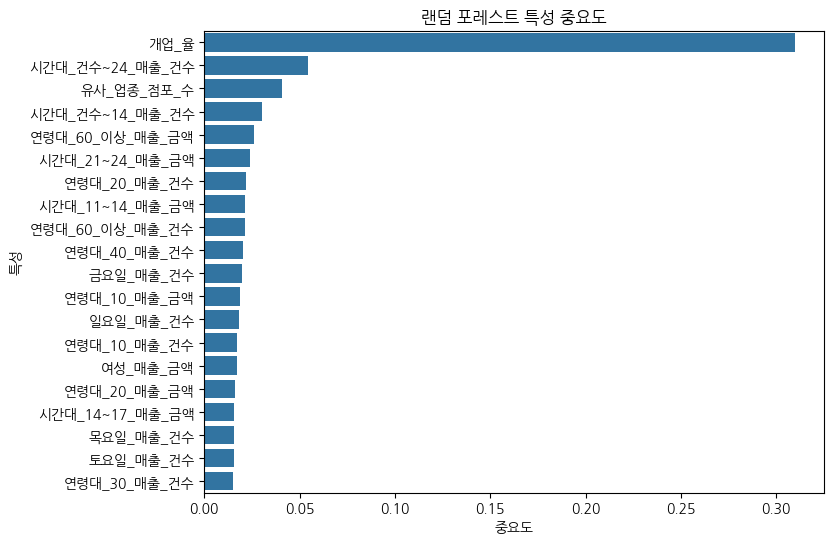

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

# 나눔고딕 폰트 사용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

%matplotlib inline

# X_train_imputed의 첫 번째 행을 기준으로 열 이름을 가져옴
column_names = feature.columns

# 랜덤 포레스트의 특성 중요도 가져오기
ftr_importances_values = rf_run.feature_importances_

# 특성 중요도를 pandas Series로 변환하여 열 이름을 인덱스로 설정
ftr_importances = pd.Series(ftr_importances_values, index=column_names)

# 특성 중요도를 기준으로 내림차순으로 정렬하고 상위 20개 선택
ftr_top = ftr_importances.sort_values(ascending=False)[:20]


# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.xlabel('중요도')
plt.ylabel('특성')
plt.title('랜덤 포레스트 특성 중요도')
plt.show()


<Axes: xlabel='시간대_건수~24_매출_건수', ylabel='폐업_률'>

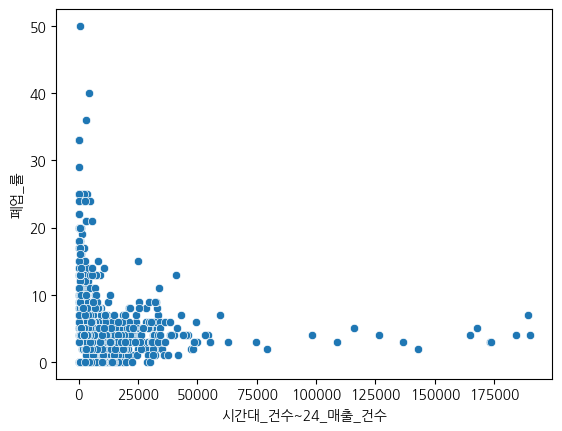

In [10]:
import seaborn as sn

# 나눔고딕 폰트 사용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

sn.scatterplot(data = data, x = data['시간대_건수~24_매출_건수'], y = data['폐업_률'])